In [1]:
import pandas as pd

import altair as alt

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
gasoline_df = pd.read_csv('data/gasoline_prices_PR.csv', index_col=0)
gasoline_df.head()

,company,liter_regular,galon_regular,liter_premium,galon_premium,liter_diesel,galon_diesel,date
6,Sol Puerto Rico,92.70,350.91,97.70,369.84,90.70,343.34,2011-05-20
7,Sol Puerto Rico,90.70,343.34,95.70,362.27,90.70,343.34,2011-05-21
12,Toral,92.74,351.06,98.74,373.77,93.74,354.84,2011-05-21
8,Sol Puerto Rico,89.70,339.55,94.70,358.48,89.70,339.55,2011-05-24
13,Petroleum Corp.,89.74,339.70,95.74,362.41,91.74,347.27,2011-05-24


In [3]:
gasoline_df['company'].value_counts()

Puma Energy            3235
Cabo Rojo Gas & Oil    3187
Sol Puerto Rico        3145
Best Pet. Corp         3009
Bitas'S Fuel Corp.     3000
Peerless Oil           2914
Total Petroleum        2259
Petroleum Corp.        2154
America Petroleum      2003
Bvi Gas Inc Dba        1077
Toral                  1077
Puerto Rico Corp.       972
Texaco                  637
Gulf                    163
Peerless                155
Ecomaxx                 129
Shell                    86
Phillips 66              70
Best Pet. Corp.          70
Jj Petroleum Dist.       10
Name: company, dtype: int64

In [4]:
puma_df = gasoline_df.query('company == "Puma Energy"')
puma_df['date'] = pd.to_datetime(puma_df['date'])
puma_df.head()

/home/kropotkin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,company,liter_regular,galon_regular,liter_premium,galon_premium,liter_diesel,galon_diesel,date
9,Puma Energy,87.15,329.90,90.08,341.00,88.83,336.25,2011-06-02
10,Puma Energy,87.11,329.75,90.02,340.75,89.53,338.90,2011-06-03
11,Puma Energy,87.41,330.90,90.15,341.25,89.53,338.90,2011-06-06
9,Puma Energy,87.57,331.50,92.17,348.90,90.88,344.00,2012-02-04
10,Puma Energy,88.50,335.00,92.66,350.75,92.33,349.50,2012-02-07


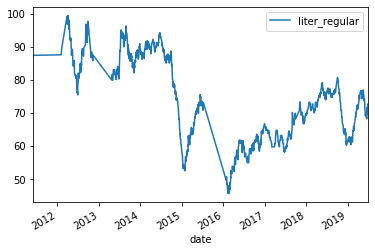

In [8]:
puma_df.plot(x = 'date', y = 'liter_regular')

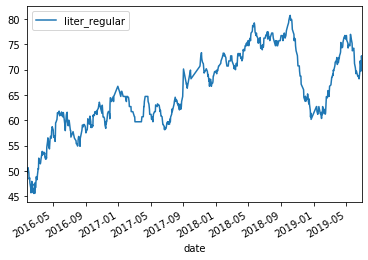

In [9]:
puma_df[puma_df.date > '2016-01-01'].plot(x = 'date', y = 'liter_regular')

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
decomp = seasonal_decompose(puma_df[puma_df.date > '2016-01-01']['liter_regular'], freq=5)

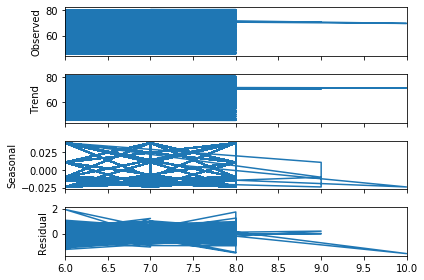

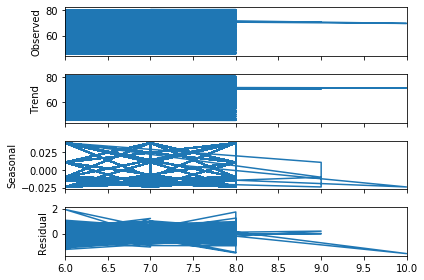

In [28]:
decomp.plot()